In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the dataset
data = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\KNN\\Zoo.csv")

In [3]:
#EXploratory Data Analysis
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
data = data.drop(['animal name'],axis = 1)

In [7]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
#droping the duplicates
data = data.drop_duplicates()

In [9]:
#Detecting the null values
data.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [10]:
data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.375629,-0.738958,0.851344,-0.081801,-0.327336,-0.222198,0.422943,0.165011,0.375629,-0.087627,-0.087627,0.217612,-0.038847,0.325973,0.276800,-0.506624
feathers,-0.375629,1.000000,0.361847,-0.348248,0.509992,-0.075548,-0.077991,-0.531672,0.281838,0.255319,-0.200125,-0.200125,-0.212423,0.375629,-0.077132,0.114141,-0.279029
eggs,-0.738958,0.361847,1.000000,-0.885789,0.315264,0.228552,0.038072,-0.608878,-0.315264,-0.272893,0.074451,-0.030135,-0.034081,-0.158439,-0.239308,-0.308595,0.589878
milk,0.851344,-0.348248,-0.885789,1.000000,-0.299153,-0.201502,-0.069674,0.582364,0.384419,0.348248,-0.272965,0.044896,0.015825,0.133544,0.256802,0.415999,-0.692458
airborne,-0.081801,0.509992,0.315264,-0.299153,1.000000,-0.218568,-0.327968,-0.507109,-0.157143,0.281838,0.011835,-0.220911,0.138416,-0.001410,0.011835,-0.200762,0.034529
aquatic,-0.327336,-0.075548,0.228552,-0.201502,-0.218568,1.000000,0.360953,0.096032,0.056360,-0.524479,0.075159,0.478287,-0.202797,-0.032978,-0.227186,0.045565,0.214084
predator,-0.222198,-0.077991,0.038072,-0.069674,-0.327968,0.360953,1.000000,0.078002,0.005466,-0.262859,0.139243,0.139243,-0.088966,0.007285,-0.261506,0.122776,0.101018
toothed,0.422943,-0.531672,-0.608878,0.582364,-0.507109,0.096032,0.078002,1.000000,0.586894,0.025726,-0.020165,0.376407,-0.283499,0.215076,0.178121,0.133292,-0.458172
backbone,0.165011,0.281838,-0.315264,0.384419,-0.157143,0.056360,0.005466,0.586894,1.000000,0.312035,-0.244580,0.220911,-0.492674,0.667098,0.104538,0.364142,-0.845807
breathes,0.375629,0.255319,-0.272893,0.348248,0.281838,-0.524479,-0.262859,0.025726,0.312035,1.000000,-0.168856,-0.414843,0.232129,0.152040,0.077132,0.144871,-0.502188


In [11]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.355932,0.203390,0.661017,0.322034,0.237288,0.40678,0.576271,0.525424,0.762712,0.796610,0.135593,0.135593,2.898305,0.644068,0.135593,0.389831,3.220339
std,0.482905,0.405975,0.477427,0.471267,0.429072,0.49545,0.498390,0.503640,0.429072,0.405975,0.345295,0.345295,2.155146,0.482905,0.345295,0.491898,2.228869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


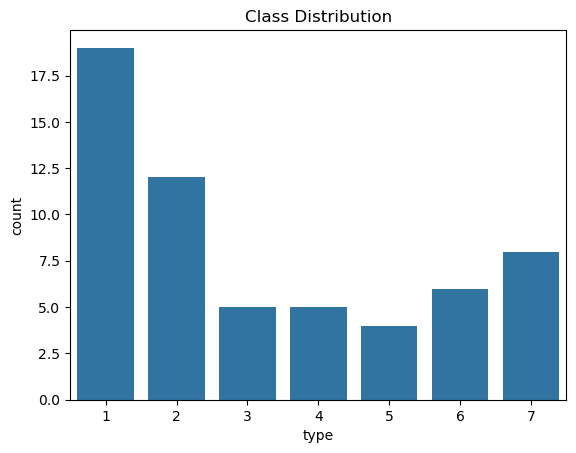

In [12]:
#Class Distribution plot of Target varaible
sns.countplot(x='type', data=data)
plt.title('Class Distribution')
plt.show()

In [13]:
#splitting the data into features and target variable
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [14]:
#Splitting the data into training and testing the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
#Standarization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
#Appling k neighbour 
kn = KNeighborsClassifier(n_neighbors = 5)

In [17]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)


In [18]:
# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

C:\Users\bhimr\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test (true labels) and y_pred (predicted labels) are already defined
# y_test: True labels for the testing set
# y_pred: Predicted labels by the classifier

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Evaluation Metrics:
Accuracy: 0.58
Precision: 0.67
Recall: 0.58
F1-Score: 0.61

Detailed Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.58        12
   macro avg       0.29      0.21      0.24        12
weighted avg       0.67      0.58      0.61        12



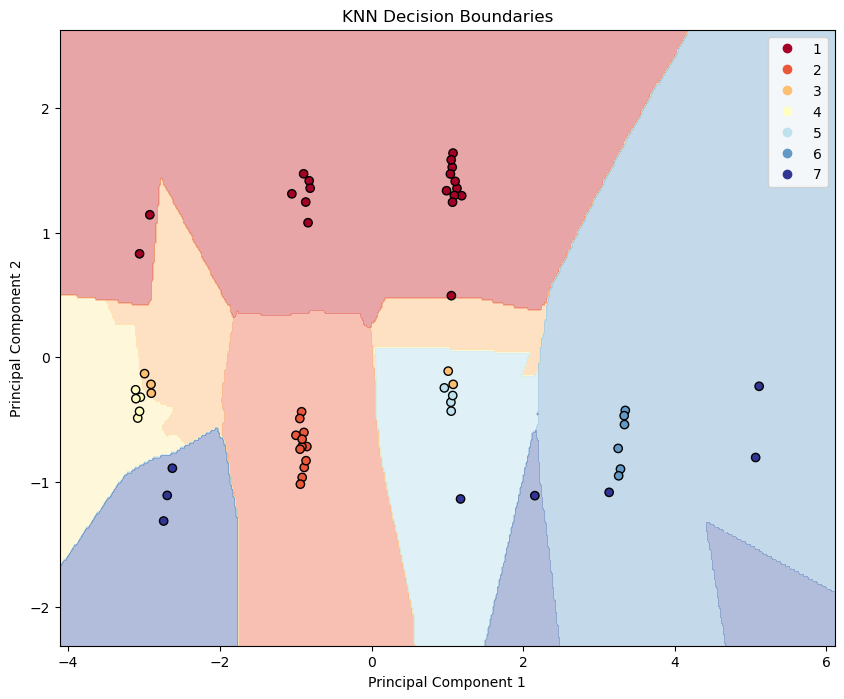

In [21]:
if x.shape[1] > 2:
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x)
else:
    x_pca = x

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_pca, y)

# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.figure(figsize=(10, 8))

# Plot the contour map
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot the training points
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)

# Add labels and title
plt.title("KNN Decision Boundaries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adjust legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)

plt.show()

In [22]:
#n_neighbors: The number of neighbors to consider for making a prediction. 
#A smaller value can lead to overfitting, while a larger value can smooth out predictions but might underfit.
#weights: Determines how much influence each neighbor has on the prediction.
#uniform: All neighbors contribute equally.
#distance: Closer neighbors have more influence.
#leaf_size: Affects the speed of the tree-based algorithms.
#Larger values can speed up query time at the cost of more memory.
#p: The power parameter for the Minkowski distance metric.
#p=1 corresponds to Manhattan distance, p=2 corresponds to Euclidean distance.

In [ ]:
#Euclidean Distance: The most common distance metric, calculated as the square root of the sum of squared differences between coordinates.
